# Open and read the dataset _NoShowAppointments_
## Appointment_filename
*Appointment_filename* is the variable for the path of the .csv-file
## reader
_reader_ is the variable which uses from pandas the DictReader. It is a quick functionality
## appointments
the variable _appointments_ includes the infromation from the variable _reader_ as a list
# Outcome are lines to 5 from _appointments_ 

In [1]:
import unicodecsv
import pandas as pd
# the mode r means that the file will be opened for reading 
# and the b flag changes the format of how the file is read
# don't forget r in front of the filename as rawpack take it 
# as it is and do not interpret in any other way 
# This code will read during iteration the .csv file and create
# a list with its content >>appointments<<
Appointment_filename = r'C:\Users\ptrki\noshowappointments-kagglev2-may-2016.csv'

with open(Appointment_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    appointments = list(reader)
pd.DataFrame(appointments[0:5])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Clean the dataset
to clean the dataset it is good to watch the time as well how long does it take to do this numpy as well pandas introduce good helpful functions
## to_datetime 
pandas introduces this function to return a date. I used this to delete at the dates the letters for example and to ensure a harmonized date-value
you can see te documentation at this link <http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html>int 

## integer 
to ensure that integers are valued as integers I used a loop for

## string
to ensure that strings are valued as strings I used a loop for

## DataFrame in pandas
after all this dataframe is stored in the variable *df*

In [2]:
# clean and initialize data
from datetime import datetime as dt
import pandas as pd
import numpy as np

# Takes a date as a string, and returns a Python datetime object.
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        date = pd.to_datetime(date, errors='coerce', box=True,
                              format=None, infer_datetime_format=True)
        return date

# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)
    
# Takes a string which is either an empty string or represents an string,
# and returns an str or None.
def parse_maybe_str(s):
    if s == '':
        return None
    else:
        return str(s)

# Clean up the data types in appointments table. 
# Except PatientId and AppointmentID
for enrollment in appointments:
    enrollment['Gender'] = parse_maybe_str(enrollment['Gender'])
    enrollment['ScheduledDay'] = parse_date(enrollment['ScheduledDay'])
    enrollment['AppointmentDay'] = parse_date(enrollment['AppointmentDay'])
    enrollment['Age'] = parse_maybe_int(enrollment['Age'])
    enrollment['Neighbourhood'] = parse_maybe_str(enrollment['Neighbourhood'])
    enrollment['Scholarship'] = parse_maybe_int(enrollment['Scholarship'])
    enrollment['Hipertension'] = parse_maybe_int(enrollment['Hipertension'])
    
    enrollment['Diabetes'] = parse_maybe_int(enrollment['Diabetes'])
    enrollment['Alcoholism'] = parse_maybe_int(enrollment['Alcoholism'])
    enrollment['Handcap'] = parse_maybe_int(enrollment['Handcap'])
    enrollment['SMS_received'] = parse_maybe_int(enrollment['SMS_received'])
    enrollment['No-show'] = parse_maybe_str(enrollment['No-show'])

df = pd.DataFrame(appointments[:])
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


# How many people have a scholarship related to the gender and age
to get knowlege of this the variable *Sship_G* is used for it. It asks the dataframe as a pivottable. The outcome is for sure a long list to include al the range of age and entries. 

In [3]:
Sship_G = df.pivot_table('Scholarship', index ='Gender',
                         columns = 'Age', aggfunc='sum')
# gives the amount of people which are issued with Scholarship according the gender
Sship_G # I tried with .dropna() but it deletes as well the whole axis at axis 1 for example

Age,-1,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,100,102,115
Gender,,,,,,,,,,,,,,,,,,,,,
F,0.0,27.0,35.0,50.0,63.0,72.0,107.0,166.0,100.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M,NaN,25.0,47.0,69.0,73.0,72.0,141.0,80.0,92.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN


# How many people have Hipertension related to gender and age
to get the information where most people have hipertension this will shown 

In [13]:
Hip_G = df.pivot_table('Hipertension', index ='Gender', 
                       columns = 'Age', aggfunc='sum')
# gives the amount of people which are issued with Hipertension according the gender
Hip_G

Age,-1,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,100,102,115
Gender,,,,,,,,,,,,,,,,,,,,,
F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,21.0,10.0,9.0,10.0,7.0,5.0,1.0,0.0,0.0,1.0
M,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,...,21.0,15.0,1.0,2.0,1.0,1.0,NaN,0.0,NaN,NaN


# How many people have diabetes related to gender and age
the next tabele gives the answer to this with th evariable *Diab_G*

In [14]:
Diab_G = df.pivot_table('Diabetes', index ='Gender',
                        columns = 'Age', aggfunc='sum')
Diab_G

Age,-1,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,100,102,115
Gender,,,,,,,,,,,,,,,,,,,,,
F,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,3.0,4.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
M,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN


# How many people have alcolism related to gender and age
*Alc_G* is the variable which shows in a pivot the answer

In [15]:
Alc_G = df.pivot_table('Alcoholism', index ='Gender', 
                       columns = 'Age', aggfunc='sum')
Alc_G

Age,-1,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,100,102,115
Gender,,,,,,,,,,,,,,,,,,,,,
F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN


# How many people have a handicap related to gender and age
*HndCap_G* as variable shows in a pivot this

In [16]:
Hndcap_G = df.pivot_table('Handcap', index ='Gender',
                          columns = 'Age', aggfunc='sum')
Hndcap_G

Age,-1,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,100,102,115
Gender,,,,,,,,,,,,,,,,,,,,,
F,0.0,1.0,1.0,1.0,0.0,2.0,4.0,1.0,4.0,10.0,...,1.0,1.0,7.0,2.0,2.0,0.0,0.0,0.0,0.0,4.0
M,NaN,0.0,0.0,0.0,0.0,7.0,0.0,10.0,9.0,1.0,...,4.0,4.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN


# How many people out of this data set have a 
1. Scholarship
2. Hipertension
3. Diabetes
4. Alcoholism
5. Handcap

In [9]:
print(df['Scholarship'].sum(axis=0), "amount of people with scholarship")
print(df['Hipertension'].sum(axis=0), "amount of people with hipertension")
print(df['Diabetes'].sum(axis=0), "amount of people with diabetes")
print(df['Alcoholism'].sum(axis=0), "amount of people with alcoholism")
print(df['Handcap'].sum(axis=0), "amount of people with a handcap")
# prints the amount of people with the 5 different diseases

10861 amount of people with scholarship
21801 amount of people with hipertension
7943 amount of people with diabetes
3360 amount of people with alcoholism
2459 amount of people with a handcap


# How are the five points devided between the gender?
this questions gives the next *Gender_amt* 
pandas delivers a very quick function for it <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html>

In [17]:
Gender_amt = df.set_index(['Gender', 'Age', 'SMS_received']).sum(level = 'Gender')
print(Gender_amt)
# prints the amount of people for different diseases 
# devided into Gender F for female, M for male

        Scholarship  Hipertension  Diabetes  Alcoholism  Handcap
Gender                                                          
F              8853         15339      5606        1223     1404
M              2008          6462      2337        2137     1055


# What is the relation between the 5 recordings? 
to answer this question it is possible to use the covariance. <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.cov.html>
Pandas delivers this covariance very quick.
are the values monoton, opposing monoton or do not have any montonie between?

In [18]:
print(Gender_amt.cov())
# the covariance is positiv if the compared varaibles 
# have a monoton in the same concordant relation between
# high (low) amount of variable 1 and high (low) amount of
# variable 2 the covariance is negativ if the compared 
# variables have a opposing monoton relation
# if the outcome is '0', than there isn't any monoon relation between the variables


              Scholarship  Hipertension    Diabetes  Alcoholism    Handcap
Scholarship    23427012.5    30381532.5  11188152.5  -3128165.0  1194452.5
Hipertension   30381532.5    39400564.5  14509456.5  -4056789.0  1549036.5
Diabetes       11188152.5    14509456.5   5343180.5  -1493933.0   570440.5
Alcoholism     -3128165.0    -4056789.0  -1493933.0    417698.0  -159493.0
Handcap         1194452.5     1549036.5    570440.5   -159493.0    60900.5


# Print the five recordings related to the Gender
hereafter there is the printout of this question it is answered with the variable *Gender_amt*.

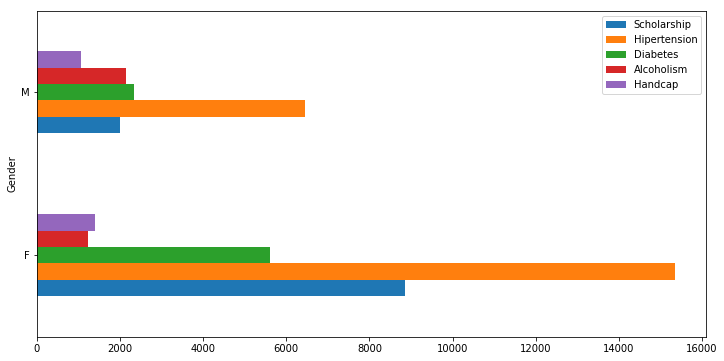

In [19]:
import matplotlib.pyplot as plt
plt.figure(); Gender_amt.plot.barh(figsize = (12, 6))
# this plot shows with bars with the different diseases between gender

# Is there a relation if a SMS is send to the appointment?
*SMS* shows how many people have received an SMS related to Gender
and *SMSNoShow* shows how many people come to the appointment with receiving the SMS 

In [20]:
SMS = df.set_index(['Neighbourhood', 'Age', 'Gender', 'Handcap', 
                    'Diabetes', 'Scholarship', 'Hipertension', 
                    'Alcoholism']).sum(level = 'Gender')
print(SMS)
# This will print the amount of sent SMS to the different gender
SMSNoShow = df.set_index(['Neighbourhood', 'Age', 'No-show', 
                          'Gender', 'Handcap', 'Diabetes', 
                          'Scholarship', 'Hipertension', 
                          'Alcoholism']).sum(level = 'No-show')
print(SMSNoShow)
# this will print the amount of sent SMS and how many 
# people followed the appointment
# (Np-show: "No" is the amount of people which followed)

        SMS_received
Gender              
F              24202
M              11280
         SMS_received
No-show              
No              25698
Yes              9784


# how many SMS where sent and how many people attended to the appointment?
the answer gives with the answer before the effect of sending an SMS or not. There is only a small effect if an sms is send or not in relation to take care about the appointment. I would suggest to keep the sending of SMS. It makes thinking worthwhile appointment

In [21]:
Amount_SMS = 0
Attended_patient = 0
for enrollment in appointments:    
    if enrollment['SMS_received'] == 1:
        Amount_SMS += 1
    if enrollment['No-show'] == 'No':
        Attended_patient += 1
print("The amount of sent SMS is", Amount_SMS)
print("The amount of attended patients are", Attended_patient)


The amount of sent SMS is 35482
The amount of attended patients are 88208


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000258277D3E10>],
      dtype=object)

<Figure size 432x288 with 0 Axes>

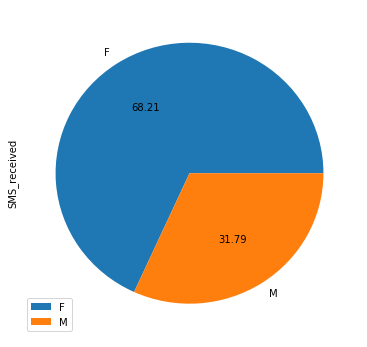

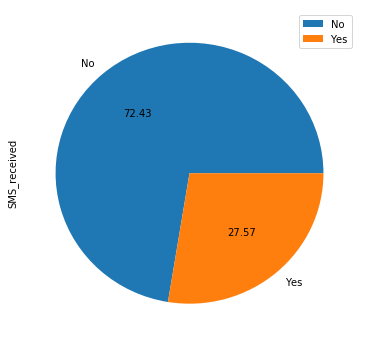

In [61]:
plt.figure()
SMS.plot.pie(subplots = True, figsize=(6,6), autopct='%.2f')
SMSNoShow.plot.pie(subplots = True, figsize=(6,6), autopct='%.2f')
# plots in two pies with the percentage values

In [77]:
Neighbour_Amount = df.set_index(['Gender', 'Age', 'SMS_received', 
                                 'Neighbourhood']).sum(level = 'Neighbourhood')
print(Neighbour_Amount)

                             Scholarship  Hipertension  Diabetes  Alcoholism  \
Neighbourhood                                                                  
JARDIM DA PENHA                       11          1002       327          25   
MATA DA PRAIA                          6           108        36           0   
PONTAL DE CAMBURI                      5             5         0           1   
REPÚBLICA                              9           178        66           2   
GOIABEIRAS                            36           162        56          11   
ANDORINHAS                           323           586       299          52   
CONQUISTA                            141           175        49          36   
NOVA PALESTINA                       310           552       242         122   
DA PENHA                             292           593       244         172   
TABUAZEIRO                           537           712       240          57   
BENTO FERREIRA                        23

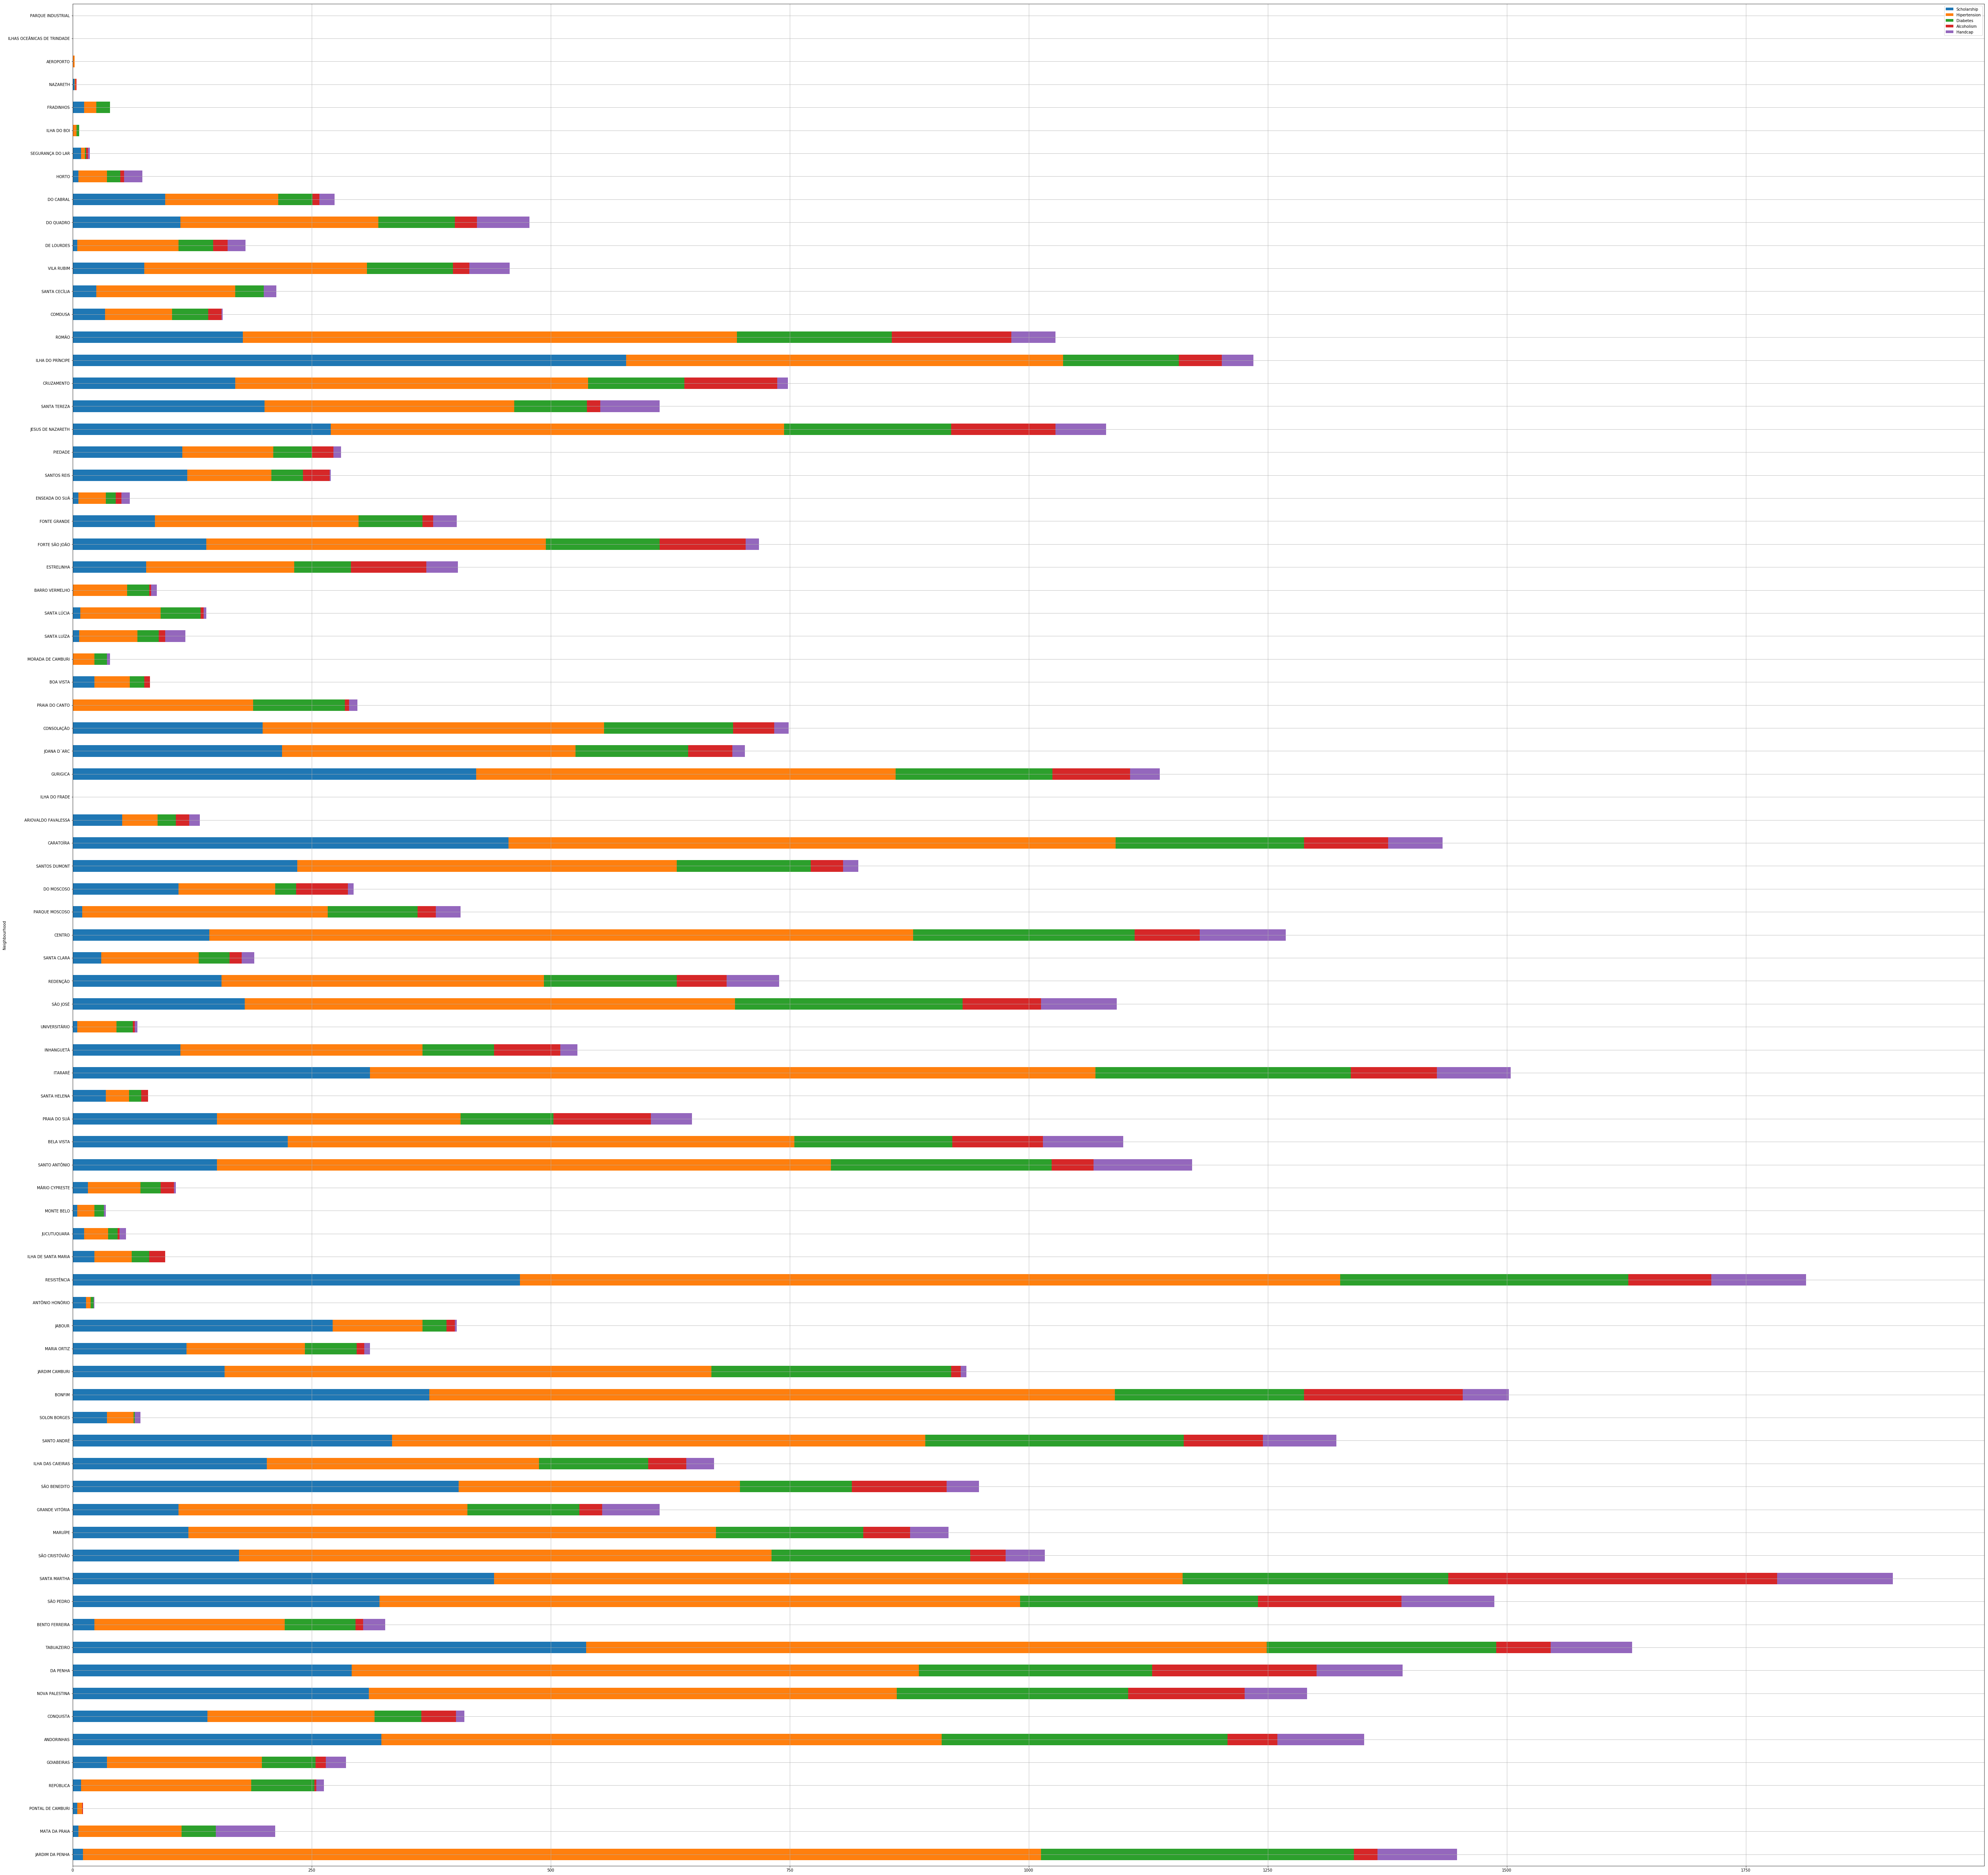

In [94]:
Neighbour_Amount.plot.barh(stacked = True, subplots = False,
                           grid = True,  figsize = (90, 90))
# plots the amount of diseases in a horizontal bar 
# according the neighbourhood. 
# it gives an overview of the deseases according the location.
# this can help to priorize the local actions to reduce the issues 
# it seems that hipertension is mostly the highest issue - 
# now the quality management of health administrations can launch studies of 
# reasons in the different locations for why hipertension occurs